## About the data
- Serial No. (Unique row ID)
- GRE Scores (out of 340)
- TOEFL Scores (out of 120)
- University Rating (out of 5)
- Statement of Purpose and Letter of Recommendation Strength (out of 5)
- Undergraduate GPA (out of 10)
- Research Experience (either 0 or 1)
- Chance of Admit (ranging from 0 to 1)

In [34]:
import pandas as pd
import numpy as np

In [35]:
df=pd.read_csv("C:/Users/sahay/OneDrive/Desktop/ML/Projects/jamboree/notebook/data/raw.csv")


In [36]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [37]:
df.shape

(501, 8)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          501 non-null    int64  
 1   TOEFL Score        501 non-null    int64  
 2   University Rating  501 non-null    int64  
 3   SOP                501 non-null    float64
 4   LOR                501 non-null    float64
 5   CGPA               501 non-null    float64
 6   Research           501 non-null    int64  
 7   Chance of Admit    501 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [39]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,316.493014,107.203593,3.115768,3.376248,3.486028,8.577365,0.558882,0.721976
std,11.293646,6.081321,1.143053,0.991289,0.925637,0.604563,0.497017,0.141098
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.000000,0.630000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [40]:

# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 8 numerical features : ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']

We have 0 categorical features : []


In [41]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [42]:
df.duplicated().sum()

np.int64(1)

In [43]:
df.drop_duplicates()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


# EDA

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='GRE Score', ylabel='Count'>

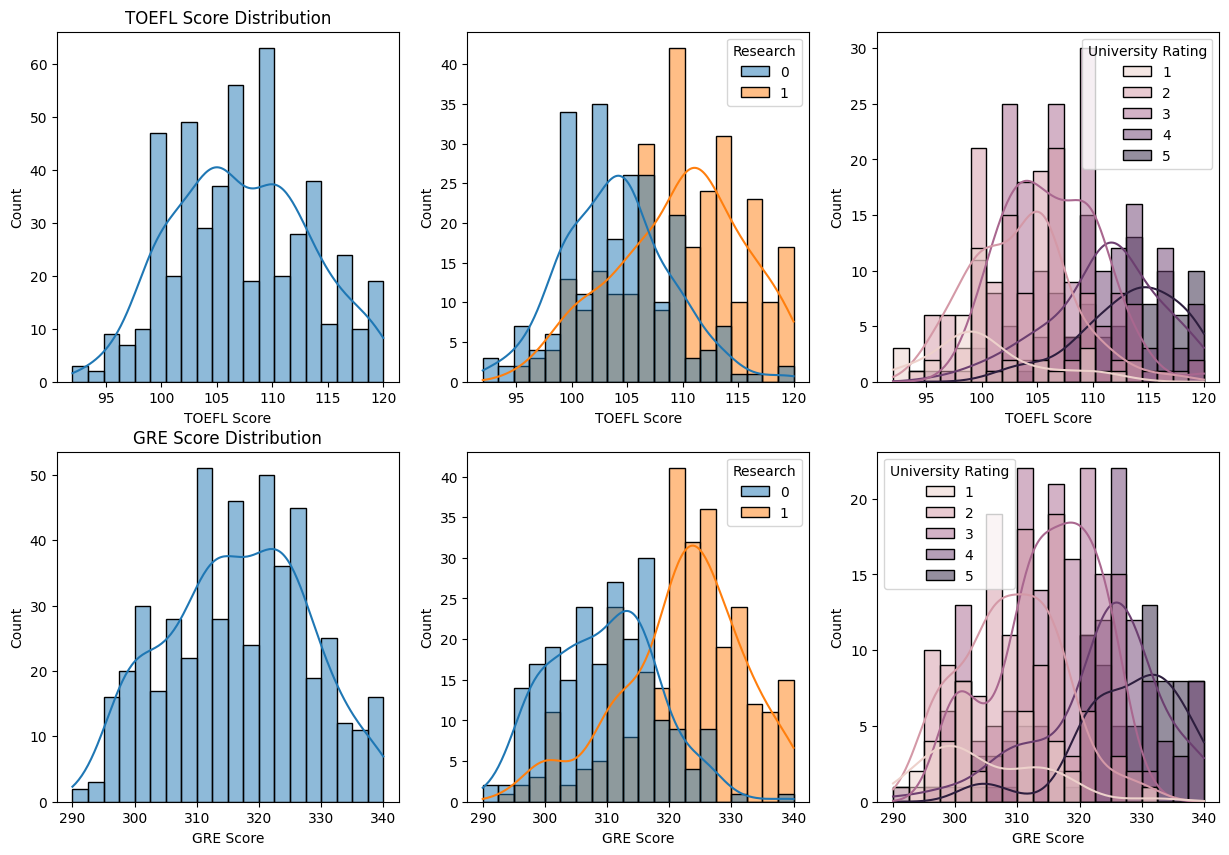

In [45]:
fig,ax=plt.subplots(2,3,figsize=(15,10))

sns.histplot(data=df,x='TOEFL Score',bins=20,kde=True,ax=ax[0,0])
ax[0,0].set_title('TOEFL Score Distribution')

sns.histplot(data=df,x='TOEFL Score',hue='Research',bins=20,kde=True,ax=ax[0,1])

sns.histplot(data=df,x='TOEFL Score',hue='University Rating',bins=20,kde=True,ax=ax[0,2])

sns.histplot(data=df,x='GRE Score',bins=20,kde=True,ax=ax[1,0])
ax[1,0].set_title('GRE Score Distribution')

sns.histplot(data=df,x='GRE Score',hue='Research',bins=20,kde=True,ax=ax[1,1])

sns.histplot(data=df,x='GRE Score',hue='University Rating',bins=20,kde=True,ax=ax[1,2])



#### Insights
##### TOEFL Score
- Most of the students are scoring between 100 and 115 in TOEFL Score
- Students scoring above 105 are only submitting Research Paper
- TOEFL scores are directly related to admission to higher ranked college

##### GRE Score
- Most of the students are scoring in the range of 310 and 330
- Students scoring above 310 are only submitting Research Papers
- GRE scores are directly related to admission to higher ranked college

<Axes: xlabel='CGPA', ylabel='Count'>

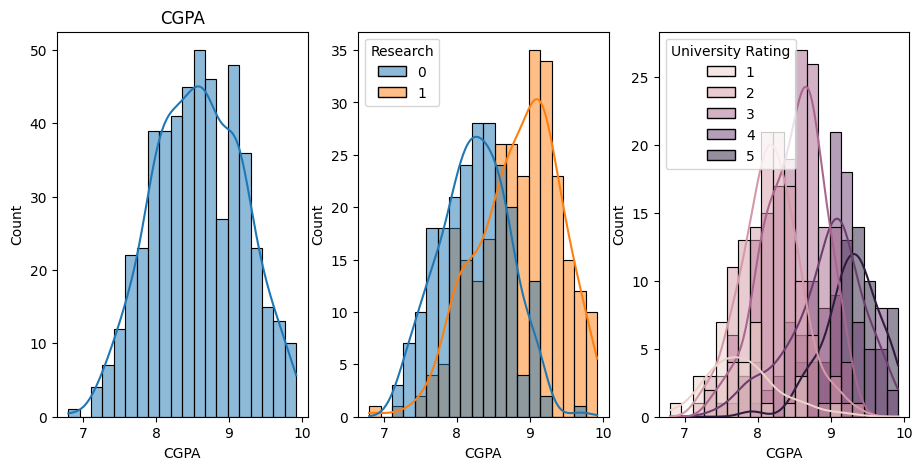

In [46]:
fig,ax=plt.subplots(1,3,figsize=(11,5))

sns.histplot(data=df,x='CGPA',kde=True,bins=20,ax=ax[0])
ax[0].set_title('CGPA')

sns.histplot(data=df,x='CGPA',kde=True,bins=20,hue='Research',ax=ax[1])

sns.histplot(data=df,x='CGPA',kde=True,bins=20,hue='University Rating',ax=ax[2])


#### Insights

- Most of the students are scoring in the range of CGPA 8 and 9.5
- Students scoring higher than or equal to 8.5 are only submitting Research Paper
- Higher CGPA gives a student better chance of admission to better colleges


<Axes: xlabel='Chance of Admit', ylabel='Count'>

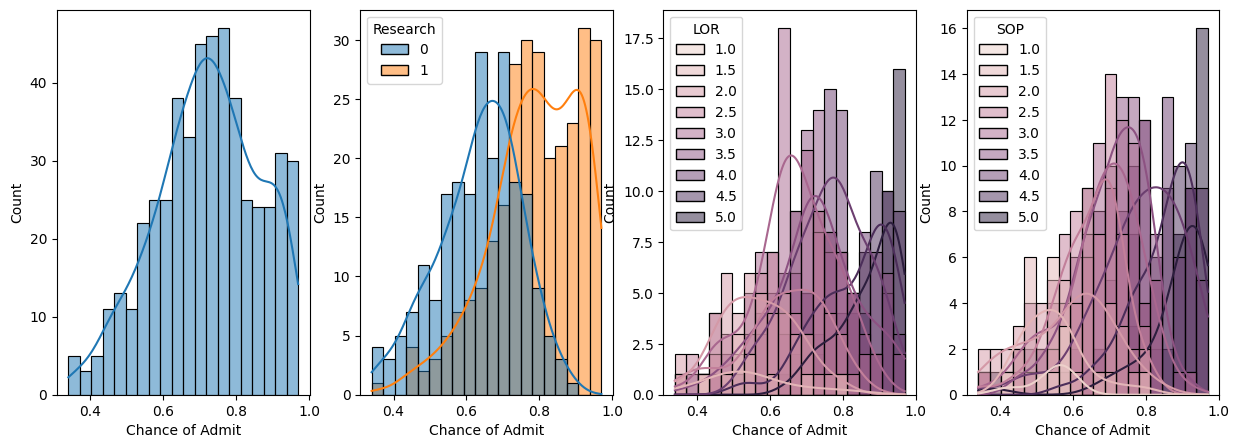

In [47]:
fig,ax=plt.subplots(1,4,figsize=(15,5))

sns.histplot(data=df,x='Chance of Admit',bins=20,kde=True,ax=ax[0])

sns.histplot(data=df,x='Chance of Admit', bins=20,kde=True,hue='Research',ax=ax[1])

sns.histplot(data=df,x='Chance of Admit',bins=20,hue='LOR',kde=True,ax=ax[2])

sns.histplot(data=df,x='Chance of Admit',bins=20,hue='SOP',kde=True,ax=ax[3])


### Insights
- Students who are scoring above 60% and have submitted Research Paper have a higher chance of admission
- Chance of Admission increases with higher strength of Letters of Recommendation and SOP

In [48]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


### CGPA Analysis

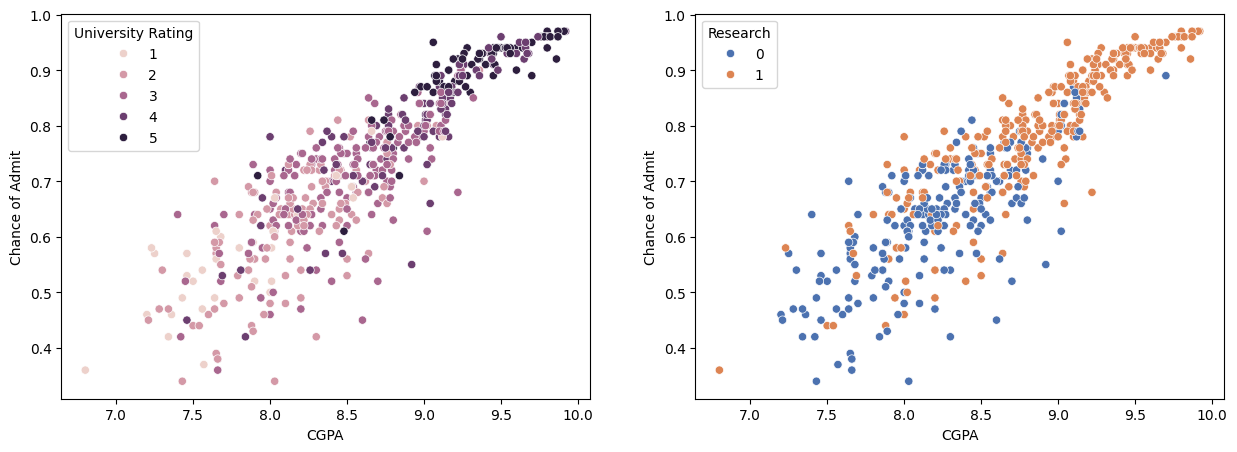

In [49]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=df,x='CGPA',y='Chance of Admit',hue='University Rating',ax=ax[0])

sns.scatterplot(data=df,x='CGPA',y='Chance of Admit',hue='Research',palette='deep',ax=ax[1])
plt.show()

### Insight
- We do not see a conclusive relationship between CGPA, University Rating and Chance of Admit based on whether a research paper was submitted or not

### Analysis of TOEFL Score

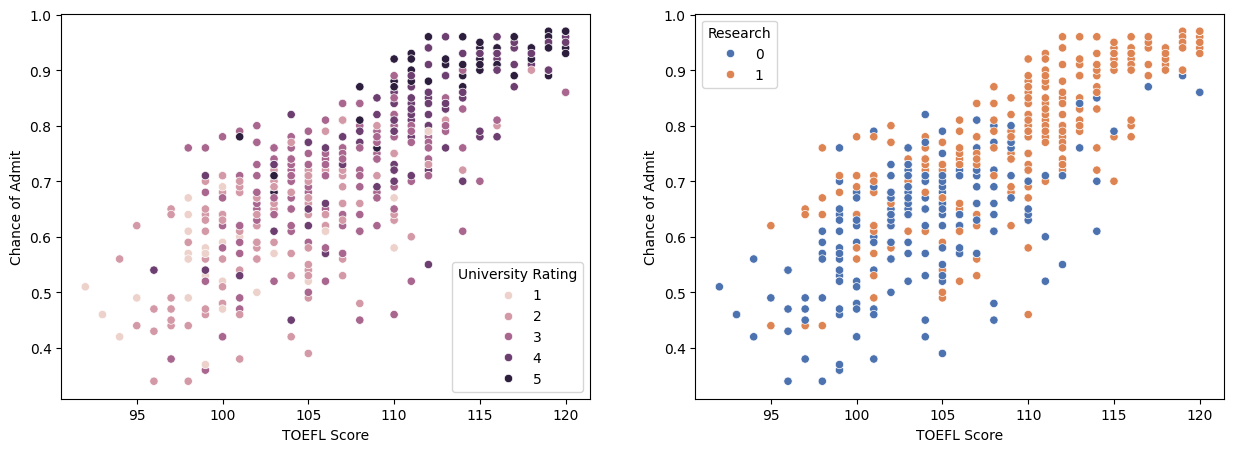

In [50]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=df,x='TOEFL Score',y='Chance of Admit',hue='University Rating',ax=ax[0])

sns.scatterplot(data=df,x='TOEFL Score',y='Chance of Admit',hue='Research',palette='deep',ax=ax[1])
plt.show()

### Insights
- For TOEFL Score we see that there is linear relationship between marks scored and Chances of Admission in higher grade college, but as we see that students who have scored low in their tests also stand a chance of getting better colleges if they have submitted a research paper.

### Analysis of GRE Score

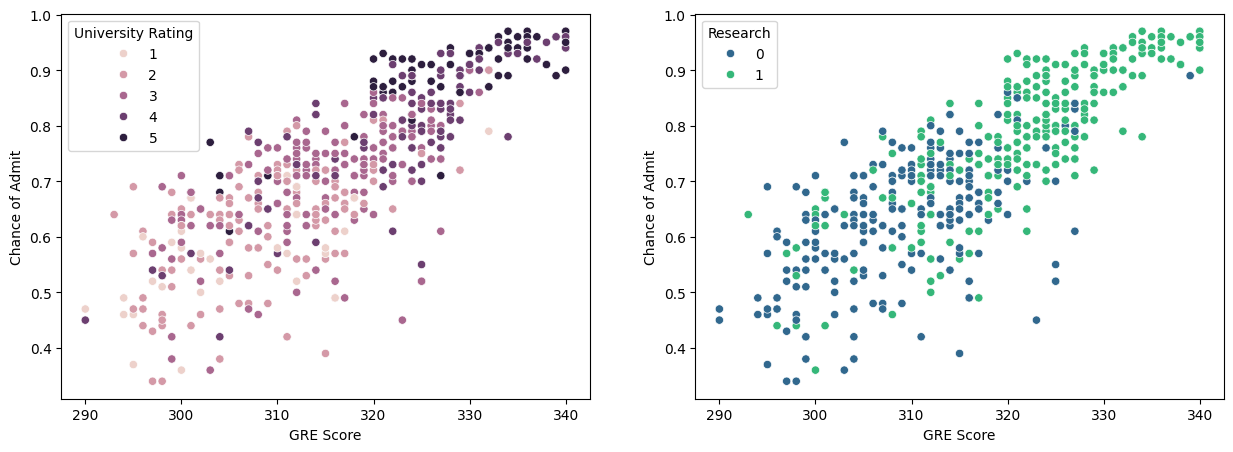

In [51]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=df,x='GRE Score',y='Chance of Admit',hue='University Rating',ax=ax[0])

sns.scatterplot(data=df,x='GRE Score',y='Chance of Admit',hue='Research',palette='viridis',ax=ax[1])
plt.show()

### Insights
- For GRE Score we see that there is linear relationship between marks scored and Chances of Admission in higher grade college, but as we see that students who have scored low in their tests also stand a chance of getting better colleges if they have submitted a research paper.

## Analysis of SOP and LOR

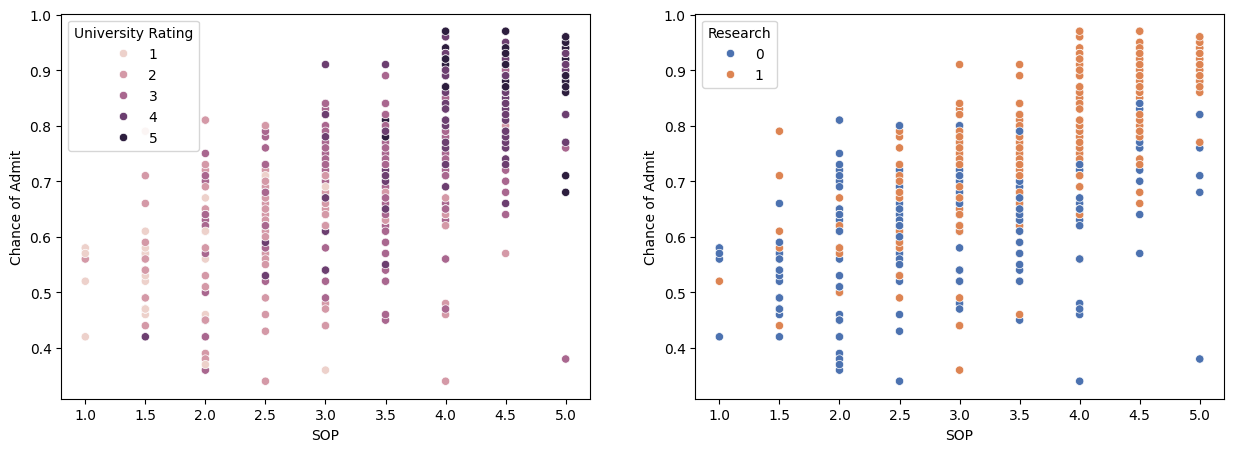

In [52]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=df,x='SOP',y='Chance of Admit',hue='University Rating',ax=ax[0])

sns.scatterplot(data=df,x='SOP',y='Chance of Admit',hue='Research',palette='deep',ax=ax[1])
plt.show()

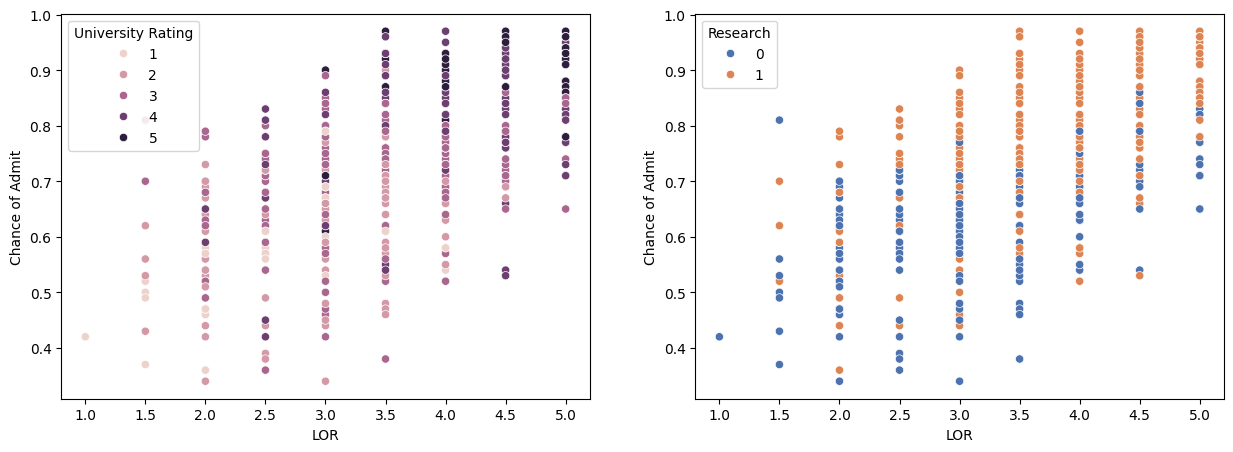

In [53]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(data=df,x='LOR',y='Chance of Admit',hue='University Rating',ax=ax[0])

sns.scatterplot(data=df,x='LOR',y='Chance of Admit',hue='Research',palette='deep',ax=ax[1])
plt.show()

- Better rated SOPs and LORs gives a better chance of admission in higher rated colleges even in absence of Research Paper

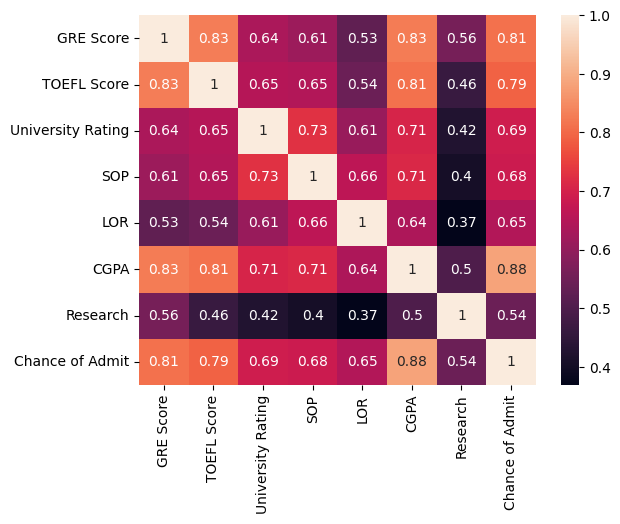

In [54]:
sns.heatmap(df.corr(),annot=True)
plt.show()